In [ ]:
# Dies sind einige der Pakete, die wir verwenden, um mit Python zu Programmieren!
%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

import numpy as np
np.random.seed(1)

## Lineare Regression
### Was ist lineare Regression?
Bei linearer Regression handelt es sich um ein statistisches Verfahren, womit ein einfaches Modell erstellt wird, welches einen Datensatz optimal abbildet. Oft wird dieses Verfahren verwendet, um einen Trend in Daten zu erkennen, womit eventuell eine Vorhersage für zukünftige Werte gemacht werden kann.

### Stell dir vor, du bekommst folgende Aufgabe:
Du hast Daten bekommen für den Wasserstand eines Sees. 
In diesen Daten steht für jede Stunde der Wasserstand in cm. über einen Zeitraum von einer Woche.

Nun ist es deine Aufgabe mit diesen Messungen eine Vorhersage darüber zu machen, wo der Wasserstand sich am Ende des achten Tages befindet.

Hier kann die lineare Regression helfen, denn sie ermöglicht es dir, einen Trend in den Daten mathematisch zu erkennen. Aber bevor wir und genauer lineare Regression anschauen, werfen wir zunächst einen Blick auf die Daten.

### Datensatz

Text(0.5, 1.0, 'Jeder Punkt ist eine Messung')

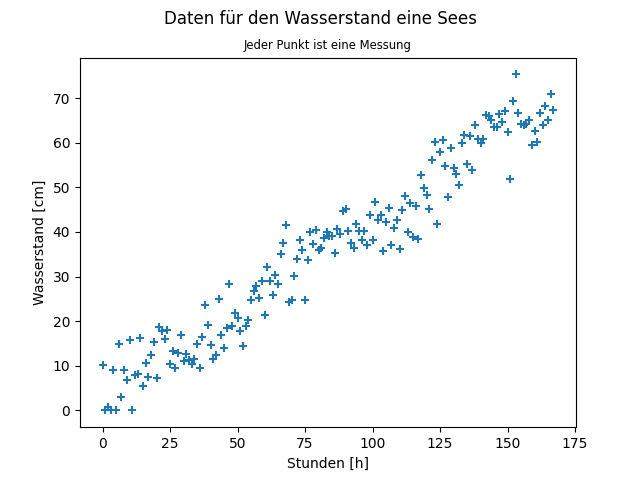

In [ ]:
np.random.seed(1)
#plt.rcParams["figure.figsize"] = (20, 10)
#plt.rcParams["font.size"] = 22
stunden_in_woche = 7 * 24
xWerte = np.arange(stunden_in_woche)
yWerte = np.clip(
    xWerte * 0.4
    + np.random.normal(2, 5, size=(stunden_in_woche,))
    + 3 * np.sin(0.1 * xWerte),
    0,
    np.inf
)


fig, ax = plt.subplots()
ax.scatter(xWerte, yWerte, marker="+")
fig.suptitle("Daten für den Wasserstand eine Sees")
ax.set_xlabel("Stunden [h]")
ax.set_ylabel("Wasserstand [cm]")
ax.set_title("Jeder Punkt ist eine Messung", fontsize="small")


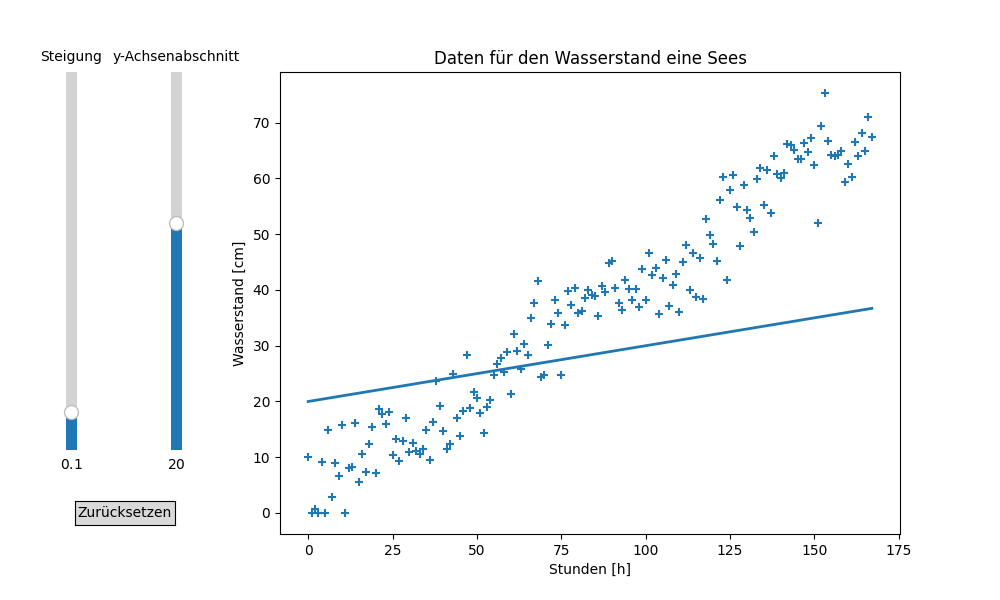

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
line, = plt.plot(xWerte, 0.1*xWerte+20, lw=2)
ax.set_xlabel("Stunden [h]")
ax.set_ylabel("Wasserstand [cm]")
ax.set_title("Daten für den Wasserstand eine Sees")
ax.scatter(xWerte, yWerte, marker="+")
plt.subplots_adjust(left=0.28)

axamp = plt.axes([0.06, 0.25, 0.0225, 0.63])
steig = Slider(
    ax=axamp,
    label="Steigung",
    valmin=0,
    valmax=1,
    valinit=0.1,
    orientation="vertical"
)

axamp = plt.axes([0.165, 0.25, 0.0225, 0.63])
yachsab = Slider(
    ax=axamp,
    label="y-Achsenabschnitt",
    valmin=-10,
    valmax=40,
    valinit=20,
    orientation="vertical"
)

resetax = plt.axes([0.075, 0.125, 0.1, 0.04])
button = Button(resetax, 'Zurücksetzen', hovercolor='0.975')

def update(val):
    line.set_ydata(xWerte * steig.val + yachsab.val)
    fig.canvas.draw_idle()

def reset(event):
    steig.reset()
    yachsab.reset()

steig.on_changed(update)
yachsab.on_changed(update)
button.on_clicked(reset)

plt.show()

In [ ]:
def three(x, y, z):
    return (x, y, z)

_ = widgets.interact(
    three, 
    x=(0, 10, 1), 
    y=True, 
    z=['a', 'b', 'c']
)

interactive(children=(IntSlider(value=5, description='x', max=10), Checkbox(value=True, description='y'), Drop…